# car price prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("cardekho.csv")
dataset.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,selling_price
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,370000
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0,158000
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0,225000
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0,130000


In [3]:
dataset.shape

(8128, 12)

In [4]:
dataset.isnull().sum()

name                    0
year                    0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
selling_price           0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  7907 non-null   float64
 8   engine              7907 non-null   float64
 9   max_power           7913 non-null   object 
 10  seats               7907 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


missing values filling part

In [6]:
for i in dataset.select_dtypes(include="float64").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

C:\Users\A.JASWANTH\AppData\Local\Temp\ipykernel_3388\3085367277.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


In [7]:
for i in dataset.select_dtypes(include="object").columns:
    dataset[i].fillna(dataset[i].mode()[0], inplace=True)

C:\Users\A.JASWANTH\AppData\Local\Temp\ipykernel_3388\3862753010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset[i].fillna(dataset[i].mode()[0], inplace=True)


In [8]:
dataset.isnull().sum()

name                  0
year                  0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
selling_price         0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   object 
 4   seller_type         8128 non-null   object 
 5   transmission        8128 non-null   object 
 6   owner               8128 non-null   object 
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   object 
 10  seats               8128 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [10]:
dataset["name"].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

categorical value to numerical value

In [11]:
from sklearn.preprocessing import LabelEncoder

car_name

In [12]:
car_name_le = LabelEncoder()
dataset["name"] = car_name_le.fit_transform(dataset["name"])

fuel_name

In [13]:
dataset["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [14]:
fuel_le = LabelEncoder()
dataset["fuel"] = fuel_le.fit_transform(dataset["fuel"])

seller_type         

In [15]:
seller_type_le = LabelEncoder()
dataset["seller_type"] = seller_type_le.fit_transform(dataset["seller_type"])

transmission

In [16]:
transmission_le = LabelEncoder()
dataset["transmission"] = transmission_le.fit_transform(dataset["transmission"])

owner

In [17]:
owner_le = LabelEncoder()
dataset["owner"] = owner_le.fit_transform(dataset["owner"])

max_power

In [18]:
max_power_le = LabelEncoder()
dataset["max_power"] = owner_le.fit_transform(dataset["max_power"])

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   int32  
 1   year                8128 non-null   int64  
 2   km_driven           8128 non-null   int64  
 3   fuel                8128 non-null   int32  
 4   seller_type         8128 non-null   int32  
 5   transmission        8128 non-null   int32  
 6   owner               8128 non-null   int32  
 7   mileage(km/ltr/kg)  8128 non-null   float64
 8   engine              8128 non-null   float64
 9   max_power           8128 non-null   int32  
 10  seats               8128 non-null   float64
 11  selling_price       8128 non-null   int64  
dtypes: float64(3), int32(6), int64(3)
memory usage: 571.6 KB


In [20]:
dataset.drop(columns=["seats"], inplace=True)

In [21]:
dataset.head(5)

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,selling_price
0,1307,2014,145500,1,1,1,0,23.40,1248.0,244,450000
1,1607,2014,120000,1,1,1,2,21.14,1498.0,15,370000
2,385,2006,140000,3,1,1,4,17.70,1497.0,253,158000
3,781,2010,127000,1,1,1,0,23.00,1396.0,295,225000
4,1349,2007,120000,3,1,1,0,16.10,1298.0,287,130000


here we cant go for the outlier , because some car prices must be more than other.., so we cant go for it.

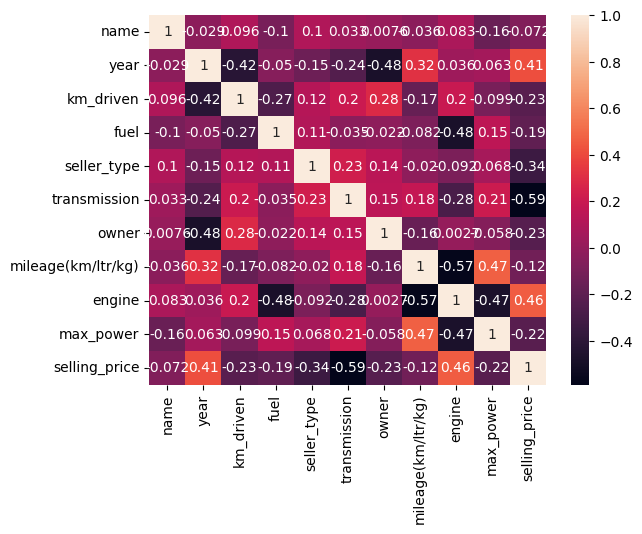

In [22]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

# MAIN PART  

📌 the data magintude is different from each other, we can go for **feature scaling**, to resolve this.

In [23]:
x = dataset.iloc[:, :-1]
y = dataset["selling_price"]

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [26]:
x

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power
0,0.454710,0.048464,1.338363,-0.889115,0.277607,0.385158,-0.666639,1.003214,-0.411305,0.536950
1,1.001120,0.048464,0.887411,-0.889115,0.277607,0.385158,0.970600,0.435734,0.090536,-2.012082
2,-1.224592,-1.929775,1.241098,1.106392,0.277607,0.385158,2.607839,-0.428040,0.088528,0.637131
3,-0.503330,-0.940656,1.011202,-0.889115,0.277607,0.385158,-0.666639,0.902775,-0.114215,1.104639
4,0.531207,-1.682495,0.887411,1.106392,0.277607,0.385158,-0.666639,-0.829795,-0.310937,1.015590
...,...,...,...,...,...,...,...,...,...,...
8123,-0.521543,-0.198816,0.710567,1.106392,0.277607,0.385158,-0.666639,-0.227162,-0.513680,0.792967
8124,-0.731001,-1.682495,0.869726,-0.889115,0.277607,0.385158,0.151980,-0.654027,0.080499,-1.845115
8125,0.476566,-1.187935,0.887411,-0.889115,0.277607,0.385158,-0.666639,-0.026284,-0.411305,0.503557
8126,1.168686,-0.198816,-0.792605,-0.889115,0.277607,0.385158,-0.666639,1.045900,-0.114215,0.403377


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

***

In [ ]:
# lr = LinearRegression()
# lr.fit(x_train, y_train)
# lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(56.30718480792156, 57.9137904314712)

In [ ]:
# lr1 = Lasso(alpha=0.05)
# lr1.fit(x_train, y_train)
# lr1.score(x_train, y_train)*100, lr1.score(x_test, y_test)*100

(56.3071848079179, 57.913789175700906)

In [ ]:
# lr2 = Ridge(alpha=5)
# lr2.fit(x_train, y_train)
# lr2.score(x_train, y_train)*100, lr2.score(x_test, y_test)*100

(56.307158437321206, 57.90980758175759)

In [ ]:
# lr3 = ElasticNet(alpha=0.05)
# lr3.fit(x_train, y_train)
# lr3.score(x_train, y_train)*100, lr3.score(x_test, y_test)*100

(56.283028990904796, 57.7773010460076)

In [ ]:
# dt = DecisionTreeRegressor()
# dt.fit(x_train, y_train)
# dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(99.98570167753937, 94.1547075453625)

In [ ]:
# mean_squared_error(y_test, dt.predict(x_test)), mean_absolute_error(y_test, dt.predict(x_test))

(38314982536.29709, 77368.8870832939)

***

In [31]:
rf = RandomForestRegressor(n_estimators= 100)
rf.fit(x_train, y_train)
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(99.49946969632843, 96.93222243123714)

In [32]:
mean_squared_error(y_test, rf.predict(x_test)), mean_absolute_error(y_test, rf.predict(x_test))

(20108804629.465275, 65406.71925070059)

In [33]:
rf.predict([[0.454710,	0.048464,	1.338363,	-0.889115,	0.277607,	0.385158,	-0.666639,	1.003214,	-0.411305,	0.536950]])

C:\Users\A.JASWANTH\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([477111.47666667])

In [34]:
y_test

1971     198000
4664     500000
5448     425000
3333     150000
2316     525000
         ...   
1149    5500000
5002     370000
6008     374000
2283     575000
5428     140000
Name: selling_price, Length: 1626, dtype: int64

***

In [ ]:
# sv = SVR()
# sv.fit(x_train, y_train)
# sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(-5.4561018405533845, -5.288723364405068)

In [ ]:
# knn = KNeighborsRegressor(n_neighbors=1)
# knn.fit(x_train, y_train)
# knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

(99.97584898444113, 95.43681080634846)

In [ ]:
# mean_squared_error(y_test, knn.predict(x_test)), mean_absolute_error(y_test, knn.predict(x_test))

(29910995150.613163, 83764.29827798277)

***